<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Clustering in Customer Segmentation

En este ejemplo veremos como realizar una segmentación de clientes empleando métodos de aprendizaje automático (machine learning, ML). En concreto, emplearemos algoritmos de clustering no supervisado.

El conjunto de datos sobre el que trabajaremos está disponible en: 
https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

Este conjunto de datos ha sido creado con el propósito de aprender los conceptos de segmentación de clientes, también conocidos como análisis de la cesta de la compra.

El conjunto de datos contiene:

- 200 clientes
- 5 atributos

## Carga de las librerías

En primer lugar, y antes de realizar cualquier tipo de análisis, procederemos a cargar las principales librerías necesarias para el uso y manipulación de los datos. 

A continuación, cargaremos los datos y veremos algunos de los principales datos del *dataset*.

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Carga de los datos

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv", encoding="ISO-8859-1")

print("Dataset shape is {}".format(df.shape))
df.head()

Dataset shape is (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


El detalle de los atributos de este conjunto de datos es el siguiente:

- **CustomerID**: ID único asignada al cliente
- **Gender**: género del cliente
- **Age**: edad del cliente
- **Annual Income (k$)**: ingreso anual del cliente
- **Spending Score (1-100)**: puntación asignada por el centro comercial en función del comportamiento del cliente y la naturaleza del gasto.

Para simplificar los nombres de las columnas 4 y 5, que son un poco complejos, procedemos a renombrarlas.

In [0]:
df = df.rename(columns={'Annual Income (k$)': 'Annual_income', 'Spending Score (1-100)': 'Spending_score'})

## Pre-procesamiento de los datos

En este caso estamos trabajando con un pqueño *dataset* público que continene todos los datos. Pero aún así, procederemos a ver si hay datos ausentes o valores extremos de debemos de considerar como *outliers* o errores.

In [8]:
# comprobamos si existen valores ausentes
df.isna().sum()

CustomerID        0
Gender            0
Age               0
Annual_income     0
Spending_score    0
dtype: int64

Como se puede apreciar, el *dataset* no presenta valores ausentes.

In [9]:
# Verificamos el tipo de los diferentes atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_income   200 non-null    int64 
 4   Spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Podemos ver que el atributo `Gender` está represetado como un objeto. Para simiplificar la manipulación de los datos, cambiaremos los valores por atributos numéricos, donde 0 indicará 'mujer' y 1 'hombre'.

In [12]:
# Cambiamos el tipo del atributo 'Gender'
df['Gender'].replace(['Female','Male'], [0,1], inplace=True)
df.Gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

## Análisis exploratorio de datos

A continuación, visualizaremos los datos con el objetivo de extraer información importante para que podamos ver los diferentes comportamientos de los datos. 

En este ejemplo solo consideraremos los atributos `Annual_income`, `Spending_score` y `Age`. El género solo se utilizará para separar los datos para que podamos diferenciar los valores para hombres y mujeres.

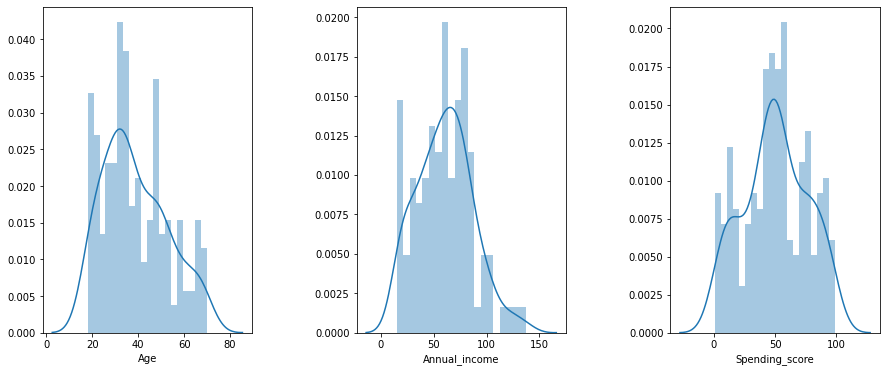

In [13]:
# Estimación de la densidad
plt.figure(1 , figsize = (15 , 6))
feature_list = ['Age','Annual_income', "Spending_score"]
feature_listt = ['Age','Annual_income', "Spending_score"]
pos = 1 
for i in feature_list:
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[i], bins=20, kde = True)
    pos = pos + 1
plt.show()

Podemos observar que la distribución de estos valores se asemeja a una distribución gaussiana, donde la gran mayoría de los valores se encuentran en el medio, con algunas excepciones en los extremos.

En el siguiente fragmento de código veremos la distribución entre hombres y mujeres.

0    112
1     88
Name: Gender, dtype: int64

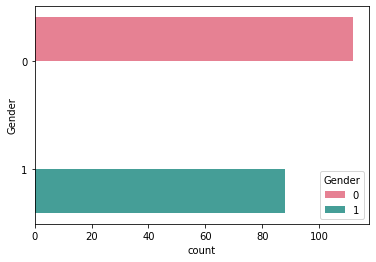

In [14]:
sns.countplot(y='Gender', data=df, palette='husl', hue = 'Gender')
df["Gender"].value_counts()

A continuación, pasamos a observar la relación entre las variables usando el género como distinción de clase. 

Para este fin usaremos la función `plotpl` dada por la librería `Seaborn`.

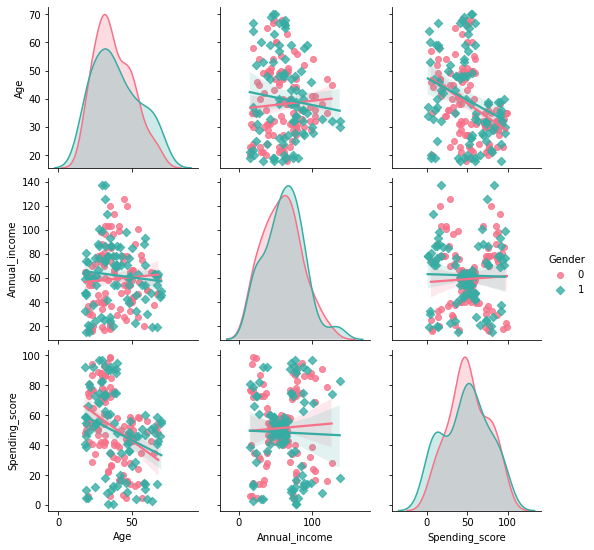

In [15]:
# Pairplot de las variables
sns.pairplot(df, vars=["Age", "Annual_income", "Spending_score"], kind="reg", hue="Gender", palette="husl", markers=['o','D'])

Podemos observar claramente la relación entre las diferentes variables que tenemos en nuestro conjunto de datos. En la diagonal del gráfico podemos ver los histogramas de cada atributo, pero esta vez haciendo una diferenciación entre mujeres y hombres.

### Relación entre las variables `Age` y `Anual_income`

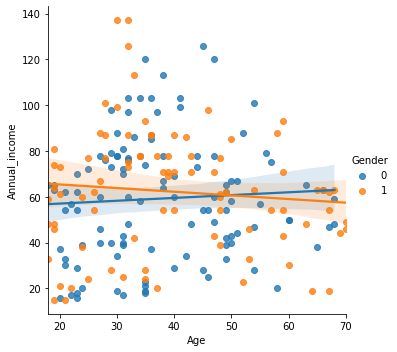

In [16]:
sns.lmplot(x="Age", y="Annual_income", data=df, hue="Gender")

Podemos ver claramente cómo las personas entre 30-50 años tienden a ganar más dinero anualmente que las personas menores de 30 o mayores de 50. 

En el gráfico también podemos ver cómo los hombres tienden a ganar un poco más de dinero que las mujeres, al menos hasta los cincuenta años.

### Relación entre las variables `Spending_score` y `Annual_income`

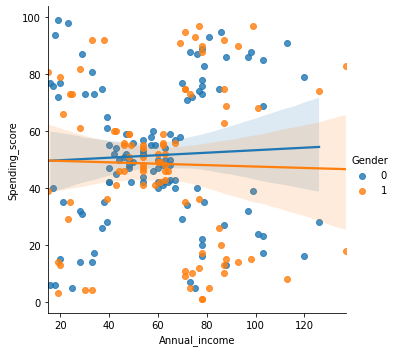

In [17]:
sns.lmplot(x="Annual_income", y="Spending_score", data=df, hue="Gender")

Podemos observar cómo un mejor ingreso anual conduce a tener una puntuación de gasto más alto, especialmente para las mujeres. Sin embargo, la correlación entre estas dos variables no es tan grande, parece que encontramos a la mayoría de las personas en el medio, personas que tienen salarios decentes y tienen un puntaje de gasto razonablemente alto.

### Relación entre las variables `Age` y `Spending_score`

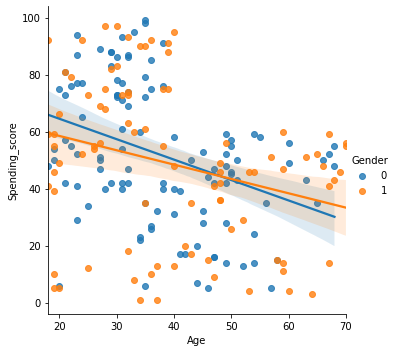

In [18]:
sns.lmplot(x="Age", y="Spending_score", data=df, hue="Gender")

Finalmente, podemos ver algo que los jóvenes tienden a gastar mucho más que las personas mayores.

## Selección del número óptimo de grupos (*clusters*)

Ahora es momento de decidir la cantidad de clústeres en los que queremos dividir nuestro *dataset*. Para hacerlo, vamos a utilizar un método empírico conocido como la regla del Codo (*Elbow method*).

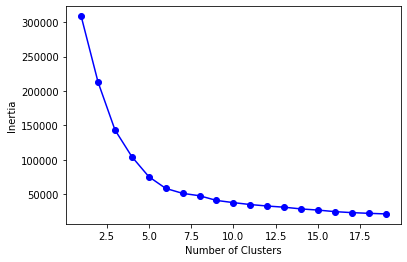

In [21]:
# Crear los datos
X = df.loc[:,["Age", "Annual_income", "Spending_score"]]
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

# Generar el gráfico
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

El método del codo se usa para determinar el número óptimo de grupos en el algoritmo **k-means**. 

Este método traza el valor de la función de coste producida por diferentes valores de *k* y se debe elegir un valor que compense el número de clusters y el aumento del error. 

En este problema, estamos utilizando la [inercia](https://scikit-learn.org/stable/modules/clustering.html#k-means) como función de costo para identificar la suma de las distancias al cuadrado de las muestras al centro de agrupación más cercano.

En este ejemplo en particular, si imaginamos que la línea en el gráfico es un brazo, el codo se puede encontrar, aproximadamente, donde el número de grupos es igual a 5. Por lo tanto, podemos seleccionar 5 como el número de grupos para dividir nuestros datos.

## Clustering

Finalmente, aplicaremos el algoritmo de clustering (aprendizaje no supervisado) conocido como [k-means](https://en.wikipedia.org/wiki/K-means_clustering).

In [0]:
# Implementación del modelo
means_k = KMeans(n_clusters=5, random_state=0)
means_k.fit(X)

labels = means_k.labels_
centroids = means_k.cluster_centers_

Para poder ver correctamente el gráfico con 3 atributos (es decir, 3 dimensiones) emplearemos una función específica de `plotly` que permite generar gráficos en 3D interactivos (podemos moverlos de forma dinámica). 

In [26]:
import plotly as py
import plotly.graph_objs as go

# Crear el gráfico 3D interactivo
trace1 = go.Scatter3d(x=X['Spending_score'], y=X['Annual_income'], z=X['Age'], mode='markers', 
                      marker=dict(color=labels, size=10, line=dict(color=labels,), opacity=0.9)
                      )
layout = go.Layout(title='Clusters', scene=dict(
    xaxis = dict(title='Spending_score'),
    yaxis = dict(title='Annual_income'),
    zaxis = dict(title='Age')
    )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

Los cinco grupos que se han creado corresponden a:

- Grupo **amarillo**: agrupa a jóvenes con ingresos anuales de moderados a bajos que realmente gastan mucho.
- Grupo **púrpura**: agrupa a personas razonablemente jóvenes con salarios bastante decentes que gastan mucho.
- Grupo **rosado**: básicamente agrupa a personas de todas las edades cuyo salario no es bastante alto y su puntaje de gasto es moderado.
- Grupo **naranja**: agrupa a personas que en realidad tienen salarios bastante buenos y apenas gastan dinero, su edad generalmente oscila entre treinta y sesenta años.
- Grupo **azul**: agrupa a personas cuyo salario es bastante bajo y no gastan mucho dinero en las tiendas.